# Akanksha Patankar

# The Spark Foundation- Task 1

# Predicting the percentage of student based on their study hours. 

# Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading Data

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Preprocessing 

In [22]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [23]:
data.nunique()

Hours     23
Scores    23
dtype: int64

# VISUALIZATION

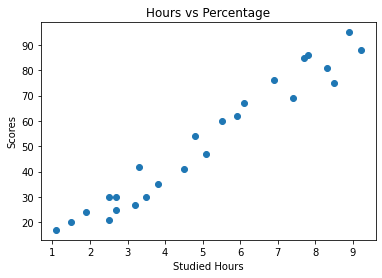

In [9]:
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()


<AxesSubplot:>

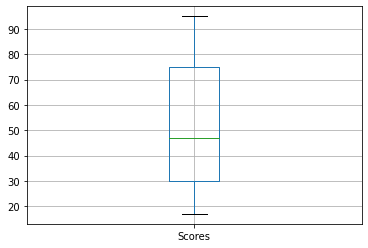

In [10]:
data.boxplot(column="Scores")

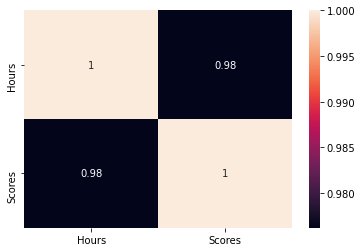

In [24]:
corrMatrix=data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
import statsmodels.formula.api as smf
model= smf.ols("Hours~Scores",data= data).fit()

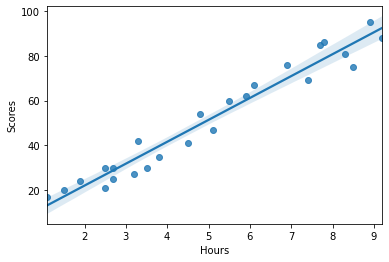

In [12]:
sns.regplot(x="Hours",y="Scores",data=data);

# Splitting Data in Train and Test

In [13]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(data["Hours"].values.reshape(-1,1),
                                              data["Scores"], test_size=0.4, random_state=14)
X_train.shape, Y_train.shape, x_test.shape, y_test.shape

((15, 1), (15,), (10, 1), (10,))


# Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Prediction

In [15]:
coefficent= model.coef_
intercept= model.intercept_

#y = m*x + c
pred= (data["Hours"].values * coefficent) + intercept

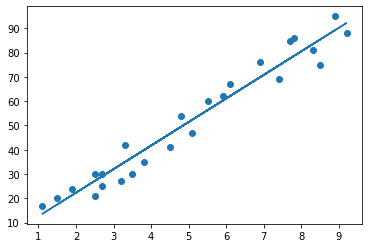

In [16]:
plt.scatter(data.Hours, data.Scores)
plt.plot(data.Hours, pred)
plt.show()

In [17]:
pred1= model.predict(x_test)
pred1

array([85.43685726, 52.40761378, 21.32126697, 89.32265061, 13.54968027,
       78.6367189 , 33.95009536, 17.43547362, 36.86444037, 69.89368386])

# Actual and Predicted Values

In [18]:
pred_compare= pd.DataFrame({"Actual": y_test, "Predicted":pred1})
pred_compare

,Actual,Predicted
3,75,85.436857
1,47,52.407614
17,24,21.321267
15,95,89.322651
14,17,13.549680
24,86,78.636719
2,27,33.950095
5,20,17.435474
4,30,36.864440
23,76,69.893684


In [20]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,pred1))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,pred1))
print("Root Mean Squared Error:",metrics.mean_squared_error(y_test,pred1)**0.5)
print("R2 Score:",metrics.r2_score(y_test,pred1))

Mean Absolute Error: 5.749953255300848
Mean Squared Error: 38.298905738984274
Root Mean Squared Error: 6.188610970079172
R2 Score: 0.9534308851558416


In [21]:
hours=np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]}will be predicted score if a student study for 9.25 hrs per day.")

92.72271979357541will be predicted score if a student study for 9.25 hrs per day.


# Prediction:-

# 92.72% will be score if a student study for 9.25 hrs per day.